## Общие методы для обработки данных
В данном разделе будут находится общие методы.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# читаем данные и создаём таблицу
def data_loader(path: str):
    return pd.read_csv(path)

# преобразуем данные так, как нам необходимо
def data_type_and_date_transform(data: pd.DataFrame) ->pd.DataFrame:
    data = data.replace(",", "", regex=True)
    data.Date = pd.to_datetime((data.Date - 25200) * 1e9 ) # Почему-то данные смещены на 7 часов относительно торгов(возможно, и не на 7, но при данном смещении одна торговая сессия укладывается в дневные промежутки)
    data = data.sort_values(by=["Date"])
    data.set_index('Date')
    data.Close = data.Close.astype(float)
    data.High = data.High.astype(float)
    data.Low = data.Low.astype(float)
    data.Open = data.Open.astype(float)
    return data

# Обрезает данные по дате. 
# Важно, чтобы даты в датафрейме были в том же формате что и начальная и конечная дата
def cut_by_date(data: pd.DataFrame, begin_date: str, end_date: str) -> pd.DataFrame:
     result = data[(data['Date'] > begin_date) & (data['Date'] < end_date)]
     result.index = data.index[:len(result)]
     return result

In [2]:
# Считываем данные
general_data = data_loader("../../Data/Minute/2010-2014-SANDP-500.txt")
general_data = data_type_and_date_transform(general_data)

In [3]:
general_data.head(20)

,Date,Open,High,Low,Close
0,2010-01-04 10:32:00,1122.87,1123.80,1122.87,1123.80
1,2010-01-04 10:33:00,1123.95,1124.18,1123.95,1124.18
2,2010-01-04 10:34:00,1124.27,1124.27,1124.07,1124.07
3,2010-01-04 10:35:00,1124.17,1124.26,1124.17,1124.26
4,2010-01-04 10:36:00,1124.63,1124.63,1124.63,1124.63
5,2010-01-04 10:37:00,1126.30,1126.30,1126.18,1126.29
6,2010-01-04 10:38:00,1126.50,1126.75,1126.50,1126.75
7,2010-01-04 10:39:00,1126.69,1126.74,1126.68,1126.68
8,2010-01-04 10:40:00,1126.54,1126.64,1126.54,1126.64
9,2010-01-04 10:41:00,1126.92,1126.92,1126.92,1126.92


In [4]:
# Производим обрезку данных 
special_data = cut_by_date(general_data, "2010-01-01", "2014-01-01")

In [5]:
# Проверяем получилось ли сделать обрезку
special_data

,Date,Open,High,Low,Close
0,2010-01-04 10:32:00,1122.87,1123.80,1122.87,1123.80
1,2010-01-04 10:33:00,1123.95,1124.18,1123.95,1124.18
2,2010-01-04 10:34:00,1124.27,1124.27,1124.07,1124.07
3,2010-01-04 10:35:00,1124.17,1124.26,1124.17,1124.26
4,2010-01-04 10:36:00,1124.63,1124.63,1124.63,1124.63
...,...,...,...,...,...
392944,2013-12-31 18:00:00,1846.74,1847.33,1846.64,1847.33
392945,2013-12-31 18:01:00,1847.43,1848.35,1847.43,1848.35
392946,2013-12-31 18:02:00,1848.35,1848.36,1848.35,1848.36
392947,2013-12-31 18:03:00,1848.35,1848.36,1848.35,1848.36


In [6]:
special_data['new_index'] = special_data.Close
special_data['new_date'] = special_data.Close
special_data.head()

C:\Users\Skiv2\AppData\Local\Temp\ipykernel_22660\85445124.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  special_data['new_index'] = special_data.Close
C:\Users\Skiv2\AppData\Local\Temp\ipykernel_22660\85445124.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  special_data['new_date'] = special_data.Close


,Date,Open,High,Low,Close,new_index,new_date
0,2010-01-04 10:32:00,1122.87,1123.80,1122.87,1123.80,1123.80,1123.80
1,2010-01-04 10:33:00,1123.95,1124.18,1123.95,1124.18,1124.18,1124.18
2,2010-01-04 10:34:00,1124.27,1124.27,1124.07,1124.07,1124.07,1124.07
3,2010-01-04 10:35:00,1124.17,1124.26,1124.17,1124.26,1124.26,1124.26
4,2010-01-04 10:36:00,1124.63,1124.63,1124.63,1124.63,1124.63,1124.63


In [7]:
import datetime
import calendar
import time
# Получаем значения нчального дня(в тестовом варианте это значение получается равным 1262563200)
special_data.new_index[0] = calendar.timegm(time.strptime(str(special_data.Date[0]), '%Y-%m-%d %H:%M:%S')) 
special_data.new_date[0] = pd.to_datetime(special_data.new_index[0] * 1e9)
for i in range(len(special_data.new_index)):
    if i > 0:
        special_data.new_index[i] = special_data.new_index[i - 1] + 60
        special_data.new_date[i] = pd.to_datetime(special_data.new_index[i] * 1e9)

C:\Users\Skiv2\AppData\Local\Temp\ipykernel_22660\705820787.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  special_data.new_index[0] = calendar.timegm(time.strptime(str(special_data.Date[0]), '%Y-%m-%d %H:%M:%S'))
C:\Users\Skiv2\AppData\Local\Temp\ipykernel_22660\705820787.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  special_data.new_date[0] = pd.to_datetime(special_data.new_index[0] * 1e9)
C:\Users\Skiv2\AppData\Local\Temp\ipykernel_22660\705820787.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.or

In [8]:
def get_data_by_date(df, target_date: str):
    target_date = pd.to_datetime(target_date)
    # Фильтрация записей
    filtered_df = df[df['Date'].dt.date == target_date.date()]
    return filtered_df

def show_plot_number_of_data_per_date(df):
    # Создание гистограммы
    filtered_df = df['Date'].dt.date
    histogram_data = filtered_df.value_counts().sort_index()

    # Построение гистограммы
    plt.bar(histogram_data.index, histogram_data.values)
    plt.xlabel('Дата')
    plt.ylabel('Количество записей')
    plt.title('Гистограмма количества записей по дням')
    plt.xticks(rotation = 45)
    plt.tight_layout()
    plt.show()

def get_max_data_size(df):
    # Создание гистограммы
    filtered_df = df['Date'].dt.date
    histogram_data = filtered_df.value_counts().sort_index()

    # Получение максимального значения
    max_count = histogram_data.max()
    return max_count

In [9]:
target_date_str = "2010-01-04"

In [10]:
# Преобразование даты для фильтрации к типу datetime
target_date = pd.to_datetime(target_date_str)

In [11]:

# Фильтрация записей
filtered_df = special_data[special_data['Date'].dt.date == target_date.date()]

In [12]:
len(filtered_df)

387

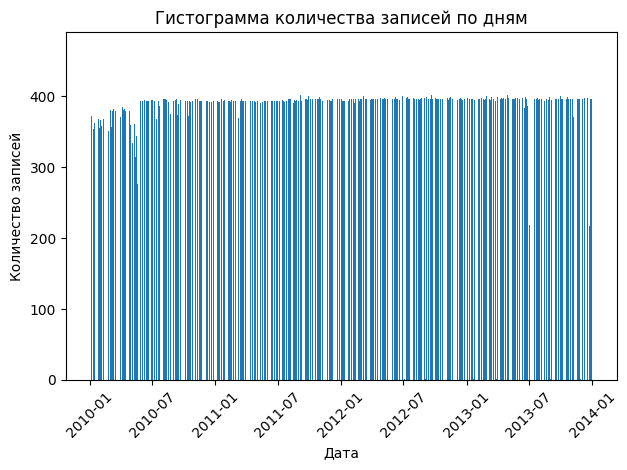

In [13]:
show_plot_number_of_data_per_date(special_data)

In [14]:
special_data.head()

,Date,Open,High,Low,Close,new_index,new_date
0,2010-01-04 10:32:00,1122.87,1123.80,1122.87,1123.80,1.262601e+09,2010-01-04 10:32:00
1,2010-01-04 10:33:00,1123.95,1124.18,1123.95,1124.18,1.262601e+09,2010-01-04 10:33:00
2,2010-01-04 10:34:00,1124.27,1124.27,1124.07,1124.07,1.262601e+09,2010-01-04 10:34:00
3,2010-01-04 10:35:00,1124.17,1124.26,1124.17,1124.26,1.262601e+09,2010-01-04 10:35:00
4,2010-01-04 10:36:00,1124.63,1124.63,1124.63,1124.63,1.262601e+09,2010-01-04 10:36:00


In [24]:
# Получение часов из даты
special_data['hour']  = special_data['Date'].dt.hour

# Группировка по часам и выбор последней минуты в каждой группе
result = special_data.groupby('hour').apply(lambda x: x[x['Date'] == x['Date'].max()])

# Удаление временной колонки
result.drop(columns = ['hour'], inplace = True)
special_data.drop(columns = ['hour'], inplace = True)
print(result)

                           Date     Open     High      Low    Close  \
hour                                                                  
0    169207 2011-09-29 00:34:00  1151.06  1151.06  1151.06  1151.06   
1    262355 2012-09-06 01:53:00  1403.44  1403.44  1403.44  1403.44   
2    392554 2013-12-31 02:01:00  1841.07  1841.07  1841.07  1841.07   
3    389144 2013-12-17 03:38:00  1786.54  1786.54  1786.54  1786.54   
4    389146 2013-12-17 04:40:00  1786.54  1786.54  1786.54  1786.54   
5    382565 2013-11-21 05:48:00  1781.37  1781.37  1781.37  1781.37   
6    387954 2013-12-12 06:47:00  1782.22  1782.22  1782.22  1782.22   
7    391356 2013-12-25 07:40:00  1833.32  1833.32  1833.32  1833.32   
8    391358 2013-12-25 08:29:00  1833.32  1833.32  1833.32  1833.32   
9    379019 2013-11-08 09:14:00  1747.15  1747.15  1747.15  1747.15   
10   377057 2013-11-01 10:59:00  1763.55  1763.55  1763.04  1763.04   
11   392583 2013-12-31 11:59:00  1843.86  1843.97  1843.86  1843.97   
12   3

C:\Users\Skiv2\AppData\Local\Temp\ipykernel_22660\2758553144.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  special_data['hour']  = special_data['Date'].dt.hour
C:\Users\Skiv2\AppData\Local\Temp\ipykernel_22660\2758553144.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  special_data.drop(columns = ['hour'], inplace = True)


In [25]:
# Функция для фильтрации последней минуты в часе
def filter_last_minute_in_hour(group):
    return group[group['Date'] == group['Date'].max()]

def minute_to_hours_transfer(df):
    df.set_index('Date', inplace = True)
    return df.groupby(pd.Grouper(freq='H')).last()

def minute_to_day_transfer(df):
    return df.groupby(df['Date'].dt.date).apply(lambda x: x.nlargest(1, columns='Date'))

# Вычисление последней минуты последнего дня в неделе
def last_minute_of_last_weekday(group):
    return group[group.dt.weekday == group.dt.weekday.max()].tail(1)

def minute_to_weeks_transfer(df):
    df.set_index('Date', inplace = True)
    return df.groupby(df.index.to_period('W')).last()

In [77]:
special_data = special_data.drop(columns=['new_index', 'new_date'])
a = special_data.copy(deep = True)
b = special_data.copy(deep = True)
c = special_data.copy(deep = True)

In [78]:
d = minute_to_hours_transfer(a)
e = minute_to_day_transfer(b)
e = e.droplevel(level=1)
f = minute_to_weeks_transfer(c)
f.reset_index(inplace = True)
f['Period_start'] = f['Date'].astype('datetime64[ns]')
f['Period_end'] = f['Period_start'] + pd.DateOffset(days = 6)
f.set_index('Period_end', inplace = True)

In [79]:
a.head(40)

,Open,High,Low,Close
Date,,,,
2010-01-04 10:32:00,1122.87,1123.80,1122.87,1123.80
2010-01-04 10:33:00,1123.95,1124.18,1123.95,1124.18
2010-01-04 10:34:00,1124.27,1124.27,1124.07,1124.07
2010-01-04 10:35:00,1124.17,1124.26,1124.17,1124.26
2010-01-04 10:36:00,1124.63,1124.63,1124.63,1124.63
2010-01-04 10:37:00,1126.30,1126.30,1126.18,1126.29
2010-01-04 10:38:00,1126.50,1126.75,1126.50,1126.75
2010-01-04 10:39:00,1126.69,1126.74,1126.68,1126.68
2010-01-04 10:40:00,1126.54,1126.64,1126.54,1126.64


In [80]:
d

,Open,High,Low,Close
Date,,,,
2010-01-04 10:00:00,1128.26,1128.35,1128.26,1128.30
2010-01-04 11:00:00,1131.83,1131.94,1131.83,1131.94
2010-01-04 12:00:00,1133.41,1133.41,1133.15,1133.15
2010-01-04 13:00:00,1133.06,1133.06,1133.01,1133.01
2010-01-04 14:00:00,1131.75,1131.75,1131.64,1131.64
...,...,...,...,...
2013-12-31 15:00:00,1846.38,1846.38,1846.25,1846.25
2013-12-31 16:00:00,1843.14,1843.33,1843.10,1843.33
2013-12-31 17:00:00,1848.13,1848.13,1846.77,1846.77


In [81]:
e.head(10)

,Date,Open,High,Low,Close
Date,,,,,
2010-01-04,2010-01-04 17:07:00,1132.99,1132.99,1132.99,1132.99
2010-01-05,2010-01-05 17:06:00,1136.52,1136.52,1136.52,1136.52
2010-01-06,2010-01-06 17:03:00,1137.14,1137.14,1137.14,1137.14
2010-01-07,2010-01-07 17:05:00,1141.69,1141.69,1141.69,1141.69
2010-01-08,2010-01-08 17:04:00,1144.99,1144.99,1144.98,1144.98
2010-01-11,2010-01-11 17:24:00,1146.98,1146.98,1146.98,1146.98
2010-01-12,2010-01-12 17:07:00,1136.22,1136.22,1136.22,1136.22
2010-01-13,2010-01-13 17:05:00,1145.68,1145.68,1145.68,1145.68
2010-01-14,2010-01-14 17:04:00,1148.46,1148.46,1148.46,1148.46


In [82]:
f

,Date,Open,High,Low,Close,Period_start
Period_end,,,,,,
2010-01-10,2010-01-04/2010-01-10,1144.99,1144.99,1144.98,1144.98,2010-01-04
2010-01-17,2010-01-11/2010-01-17,1136.03,1136.03,1136.03,1136.03,2010-01-11
2010-01-24,2010-01-18/2010-01-24,1091.76,1091.76,1091.76,1091.76,2010-01-18
2010-01-31,2010-01-25/2010-01-31,1073.72,1073.82,1073.72,1073.82,2010-01-25
2010-02-07,2010-02-01/2010-02-07,1066.20,1066.20,1066.20,1066.20,2010-02-01
...,...,...,...,...,...,...
2013-12-08,2013-12-02/2013-12-08,1805.09,1805.09,1805.09,1805.09,2013-12-02
2013-12-15,2013-12-09/2013-12-15,1775.32,1775.32,1775.32,1775.32,2013-12-09
2013-12-22,2013-12-16/2013-12-22,1818.32,1818.32,1818.32,1818.32,2013-12-16


In [86]:
d.to_csv("../../Data/Hour/sand500_MinuteToHour.csv")

In [87]:
e.to_csv("../../Data/Day/sand500_MinuteToDay.csv")

In [88]:
f.to_csv("../../Data/Week/sand500_MinuteToWeek.csv")

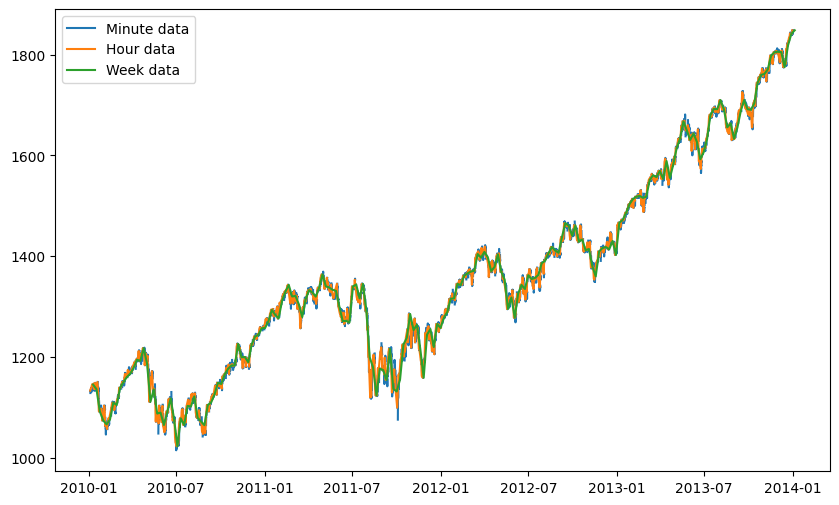

In [76]:
plt.figure(figsize=(10, 6))
plt.plot(d.Close, label = "Minute data")
plt.plot(e.Close, label = "Hour data")
plt.plot(f.Close, label = "Week data")
plt.legend()